DBSCAN Algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Data Loading and Preprocessing

In [9]:
# Load and read data frame
iris_df = pd.read_csv('resources/Iris.csv', delimiter=',')

# Lets inspect the data
iris_df.shape
iris_df.describe().T
iris_df.isnull().values.any()
iris_df.isnull().sum()

iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Let's modify the DF
# DROP Column <Id>
# DROP Column <Species> -- we will use this as Target later
# axis=0 --> horizontal row
# axis=1 --> Vertical Column
iris_df = iris_df.drop(columns='Id', axis=1)
iris_df = iris_df.drop(columns='Species', axis=1)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
# Preprocessing Data before loading into the Model
from sklearn.preprocessing import StandardScaler
# Convert the DataFrame into a Numpy nd-array
iris_df_transformed_into_ndarray = np.array(iris_df)
iris_df_transformed_into_ndarray

# Scaling and standardizing your data is often a good idea.
# Its highly recommended using a StandardScaler prior to feeding the data to a deep learning algorithm or one that depends upon the relative distance of the observations, or that uses L2 regularization.
# L1 Regularization = Sum|Weight|       --> Shrink Coefficient to ZERO  --> For Feature Selection
# L2 Regularization = Sum(weight**2)    --> Shrink Coefficient Evenly   --> For collinear/codependent feature
scaler = StandardScaler()
iris_df_ndarray_preprocessed_with_standardscaler = scaler.fit_transform(iris_df_transformed_into_ndarray)
iris_df_ndarray_preprocessed_with_standardscaler

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Experiment-01: DBSCAN - Default with no additional settings

In [44]:
# Basic DBCS Modeling with default settings
# Load the preprocessed data into the DBSCAN model
dbcs_model = DBSCAN()       # Define the ML model that will be used
dbcs_model.fit(iris_df_ndarray_preprocessed_with_standardscaler)    # Train the ML model with preprocessed iris_dataset

dbcs_model.algorithm    # Check the dbcs algorithm used  - Here it will return 'auto' with Default settings
dbcs_model.components_  # Return the Metrics similar to DataFrame
len(dbcs_model.labels_) # Number of labels in the model with data fitted

# Get all the labels from the dataframe
labels = dbcs_model.labels_     # its a nd-array [1d]
np.unique(labels)   # get all the distinct labels --> return -1,1,0
np.unique(labels, return_counts=True)   # return all the distinct labels with their frequency array([-1,  0,  1]), array([35, 44, 71])

# Let's try to find the number of clusters in labels, ignoring noise (if present)
# Number of Cluster = ?
# Number of Noise Points = ?
# Let's say all rows with Label '-1' -> is Noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of Clusters: %d" %n_clusters_)
print("Estimated number of Noise Points: %d" %n_noise_)


Estimated number of Clusters: 2
Estimated number of Noise Points: 35


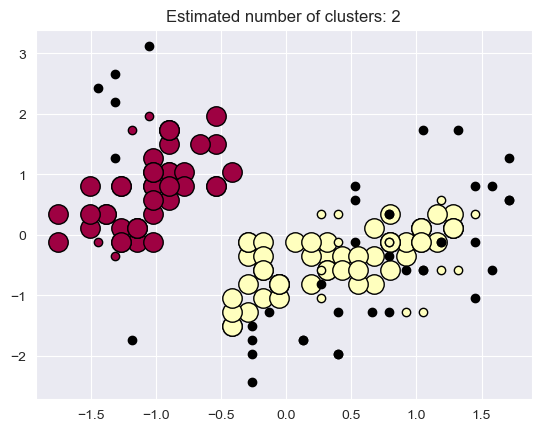

In [52]:
# Let's create a Visual Representation of the above findings using Basic DBSCAN algo
unique_labels = set(labels)

# Return an array of zeros with the same shape and type as a given array
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask

core_samples_mask[dbcs_model.core_sample_indices_] = True
#core_samples_mask
#dbcs_model.core_sample_indices_ #Indices of core samples.

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = iris_df_ndarray_preprocessed_with_standardscaler[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = iris_df_ndarray_preprocessed_with_standardscaler[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, -1],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# Experiment-02: DBSCAN with Epsilon (eps) Radius and MimPts

In [60]:
# Experiment-02: DBSCAN with Epsilon (eps) Radius and MimPts
# eps = 0.4
# min_pts = 7

# Define the Model
dbscan_model_with_param = DBSCAN(eps=0.4, min_samples=7)

# Load the preprocessed iris DataFrame into the model
dbscan_model_with_param.fit(iris_df_ndarray_preprocessed_with_standardscaler)

dbscan_model_with_param.algorithm    # Check the dbcs algorithm used  - Here it will return 'auto' with Default settings
dbscan_model_with_param.components_  # Return the Metrics similar to DataFrame
len(dbscan_model_with_param.labels_) # Number of labels in the model with data fitted

# Get all the labels from the dataframe
labels = dbscan_model_with_param.labels_     # its a nd-array [1d]
np.unique(labels)   # get all the distinct labels --> return -1,1,0
np.unique(labels, return_counts=True)   # return all the distinct labels with their frequency (array([-1,  0,  1,  2]), array([110,  19,  14,   7]))
#
# # Let's try to find the number of clusters in labels, ignoring noise (if present)
# # Number of Cluster = ?
# # Number of Noise Points = ?
# # Let's say all rows with Label '-1' -> is Noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
#
print("Estimated number of Clusters: %d" %n_clusters_)
print("Estimated number of Noise Points: %d" %n_noise_)

Estimated number of Clusters: 3
Estimated number of Noise Points: 110


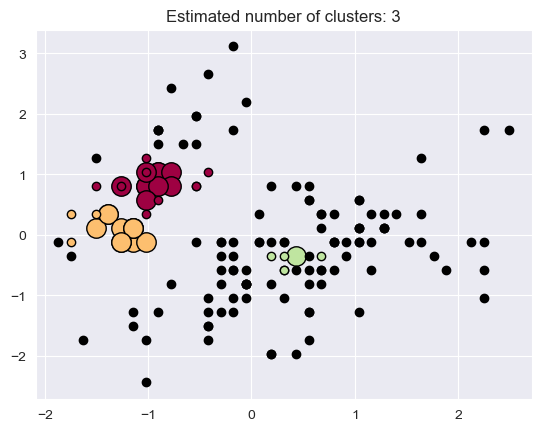

In [61]:
# Let's create a Visual Representation of the above findings using Basic DBSCAN algo
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan_model_with_param.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = iris_df_ndarray_preprocessed_with_standardscaler[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = iris_df_ndarray_preprocessed_with_standardscaler[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# Experiment_03: DBSCAN with Epsilon (eps) Radius =0.6 and MimPts=2

In [65]:
# Experiment-02: DBSCAN with Epsilon (eps) Radius and MimPts
# eps = 0.6
# min_pts = 2

# Define the Model
dbscan_model_with_param_exp_03 = DBSCAN(eps=0.6, min_samples=2)

# Load the preprocessed iris DataFrame into the model
dbscan_model_with_param_exp_03.fit(iris_df_ndarray_preprocessed_with_standardscaler)

dbscan_model_with_param_exp_03.algorithm    # Check the dbcs algorithm used  - Here it will return 'auto' with Default settings
dbscan_model_with_param_exp_03.components_  # Return the Metrics similar to DataFrame
len(dbscan_model_with_param_exp_03.labels_) # Number of labels in the model with data fitted

# Get all the labels from the dataframe
labels = dbscan_model_with_param_exp_03.labels_     # its a nd-array [1d]
np.unique(labels)   # get all the distinct labels --> return -1,1,0
np.unique(labels, return_counts=True)   # return all the distinct labels with their frequency (array([-1,  0,  1,  2,  3,  4]), array([ 7, 49, 86,  3,  3,  2]))
#
# # Let's try to find the number of clusters in labels, ignoring noise (if present)
# # Number of Cluster = ?
# # Number of Noise Points = ?
# # Let's say all rows with Label '-1' -> is Noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
#
print("Estimated number of Clusters: %d" %n_clusters_)
print("Estimated number of Noise Points: %d" %n_noise_)

Estimated number of Clusters: 5
Estimated number of Noise Points: 7


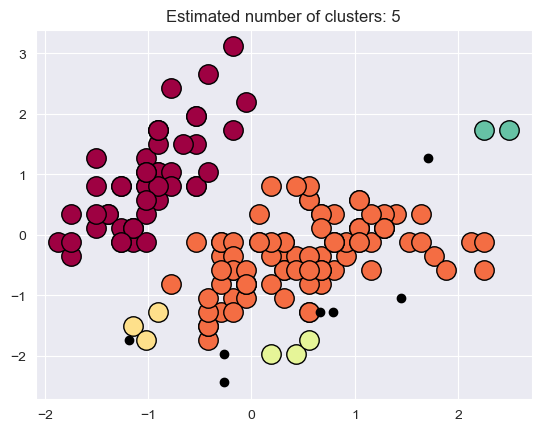

In [66]:
# Let's create a Visual Representation of the above findings using Basic DBSCAN algo
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan_model_with_param_exp_03.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, -1],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()